In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from astrapy import DataAPIClient
from dotenv import load_dotenv
from scipy.stats import skew, kurtosis


In [4]:
os.getcwd()

'c:\\Users\\Cynthia\\Documents\\projects\\customer_segmentation'

In [3]:
os.chdir("../")

In [5]:
load_dotenv(".venv")

True

In [6]:
client = DataAPIClient(os.getenv("authToken"))
db = client.get_database_by_api_endpoint(os.getenv("endpoint"))
collection=db.get_collection("customer_segmentation")
collection.find_one(projection={"_id": False})

{'customer_id': '76889',
 'age': '24',
 'gender': 'Female',
 'marital_status': 'Married',
 'education_level': 'Doctorate',
 'geographic_information': 'West Bengal',
 'occupation': 'Salesperson',
 'income_level': '111137',
 'behavioral_data': 'policy5',
 'purchase_history': '09-10-2019',
 'interactions_with_customer_service': 'Phone',
 'insurance_products_owned': 'policy3',
 'coverage_amount': '560642',
 'premium_amount': '4470',
 'policy_type': 'Family',
 'customer_preferences': 'Mail',
 'preferred_communication_channel': 'In-Person Meeting',
 'preferred_contact_time': 'Weekends',
 'preferred_language': 'German',
 'segmentation_group': 'Segment3'}

In [8]:
collection.find(limit=3, projection={"_id": False})

Cursor("customer_segmentation", idle, consumed so far: 0)

In [6]:
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

I am going to get a thorough dataset understanding before I move on to data cleaning and preprocessing. 

Firstly I will perform a preliminary analysis to undestand the structure and data types of the columns.

In [5]:
df= pd.read_csv("artifact\data_ingestion\customer_segmentation.csv")
print(df.shape)
print(df.info())
df.head()

(8950, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  2235.103331           1.000000     720.60            720.60   
1  2070.069187           1.000000    1382.57           1077.75   
2  1597.679284           1.000000     272.40              0.00   
3    94.024070           0.636364    1099.50            849.00   
4  4060.966003           1.000000     823.10            407.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00    723.308724                  1.0   
1                  304.82      0.000000                  1.0   
2                  272.40      0.000000                  1.0   
3                  250.50      0.000000                  0.5   
4                  416.10      0.000000                  0.5   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    1.000000                          0.000000   
1                    0.666667                          0.833333   
2                    0.000000                          1.000000   
3                    0.166667                          0.250000   
4                    0.166667                          0.333333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.083333                 1             12        2500.0   
1                0.000000                 0             33        2400.0   
2                0.000000                 0             16        1550.0   
3                0.000000                 0              8        6000.0   
4                0.000000                 0             13       11500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  1061.292471        689.118919               0.0      12  
1  1580.081500        466.772558               0.0      12  
2   587.710246       1090.811625               0.0      12  
3  1442.251089         95.209217               0.0      12  
4  3347.328701       1220.529171               0.0      12

I am now going to check for missing, duplicated, and unique values.

In [24]:
# missing and unique values
missing_values = (df.isnull().sum()/df.shape[0] * 100).to_frame(name="Missing Values").T
nunique = df.nunique().to_frame(name = "Unique Values").T
summary = pd.concat([missing_values, nunique])
summary

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Missing Values      0.0                0.0        0.0               0.0   
Unique Values    8871.0               43.0     6203.0            4014.0   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Missing Values                     0.0           0.0                  0.0   
Unique Values                   4452.0        4323.0                 47.0   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Missing Values                         0.0                               0.0   
Unique Values                         47.0                              47.0   

                CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Missing Values                     0.0               0.0            0.0   
Unique Values                     54.0              65.0          173.0   

                CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Missing Values      0.011173       0.0          3.497207               0.0   
Unique Values     205.000000    8711.0       8636.000000              47.0   

                TENURE  
Missing Values     0.0  
Unique Values      7.0

In [25]:
#checking for duplicated.
duplicated_values = df.duplicated().sum()
duplicated_values

np.int64(0)

**Inferences**:

* This dataset has 8950 rows and 17 columns. The data types are float64 and Int64 making all the columns numeric.
* Column MINIMUM_PAYMENTS has more than 3% missing values and CREDIT_LIMIT column has more than 1% missing values.
* The dataset has no duplicates values.

I am going to generate summary statistics to gain insight on how the columns are distributed.

In [26]:
#summary statistics for numerical variable.
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

Skewness measures the degree of symmetry of the distribution.when the disribution is symmetrical it has a mean of zero. A distribution that is less than zero is said to be left skewed and the one greater than zero is right skewed.

In [28]:
df.skew(axis=0, skipna=True)

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

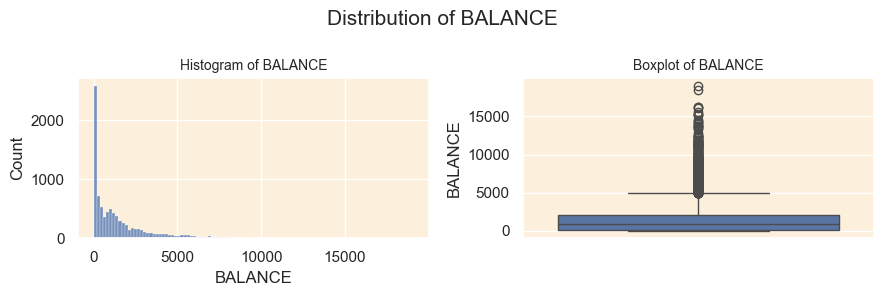

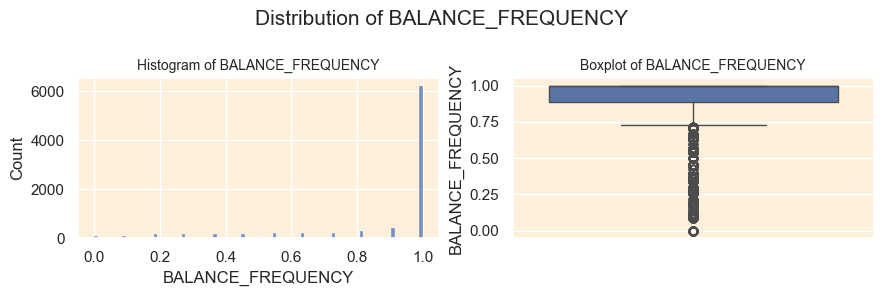

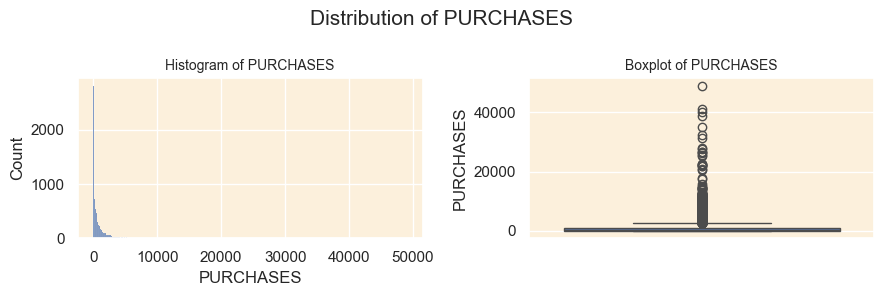

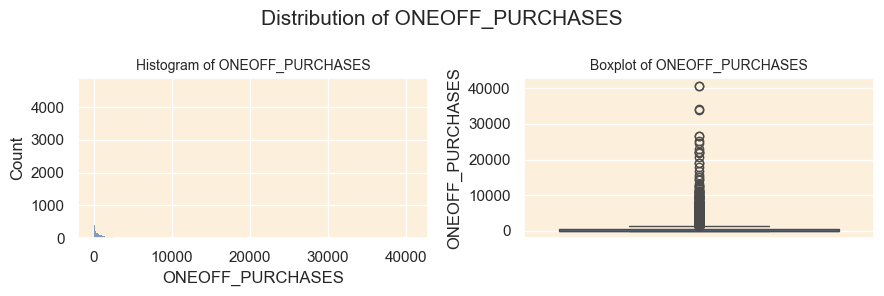

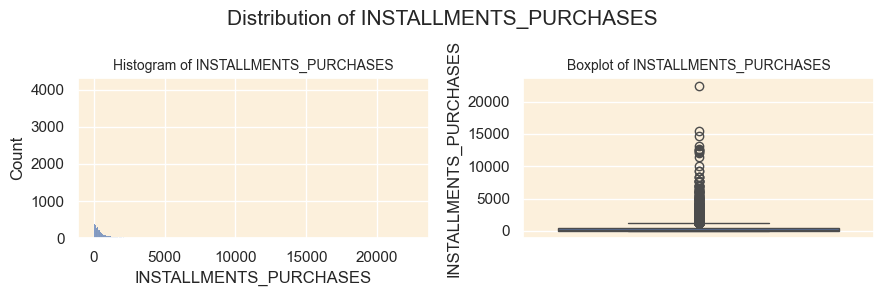

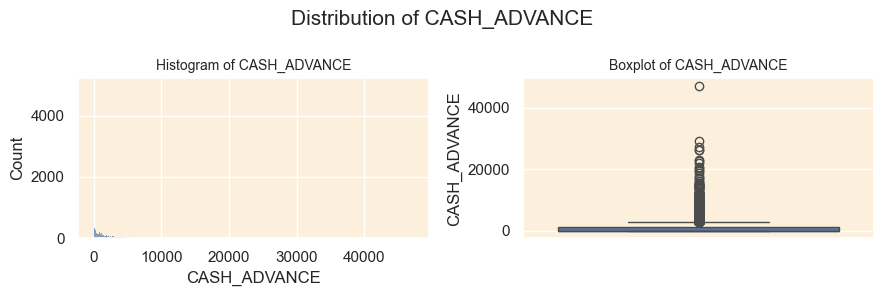

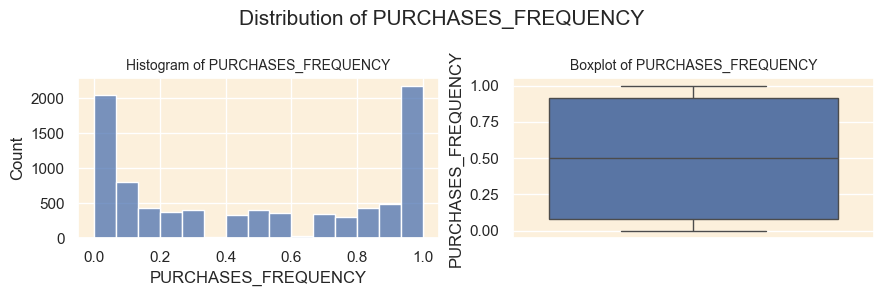

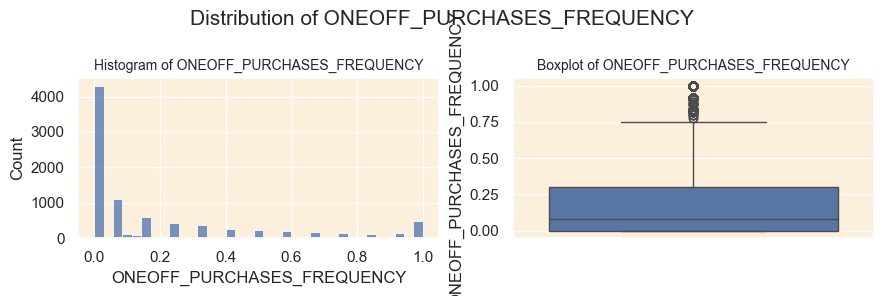

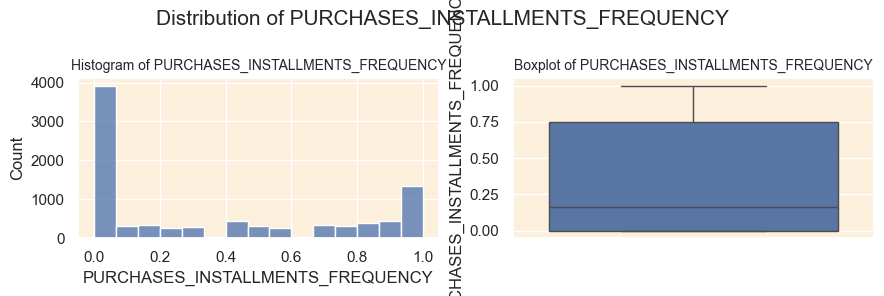

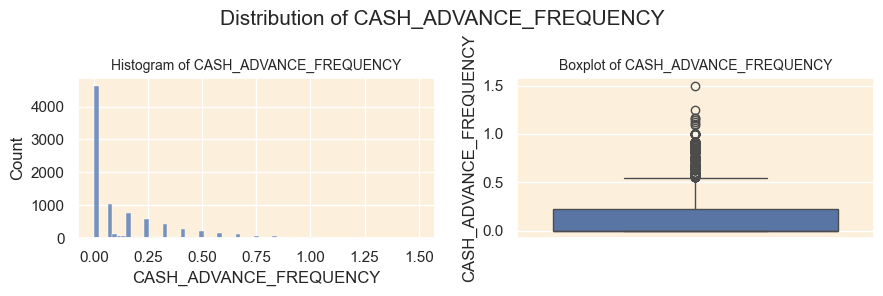

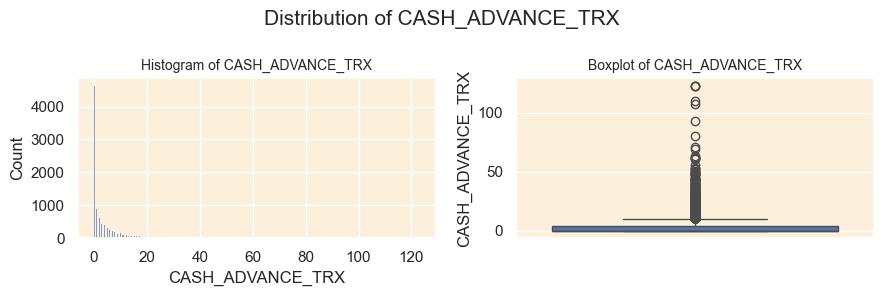

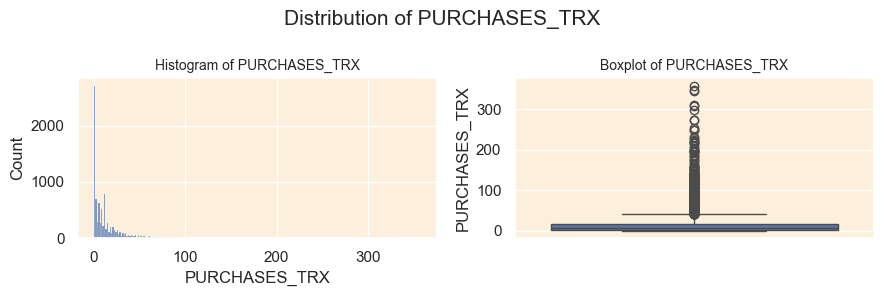

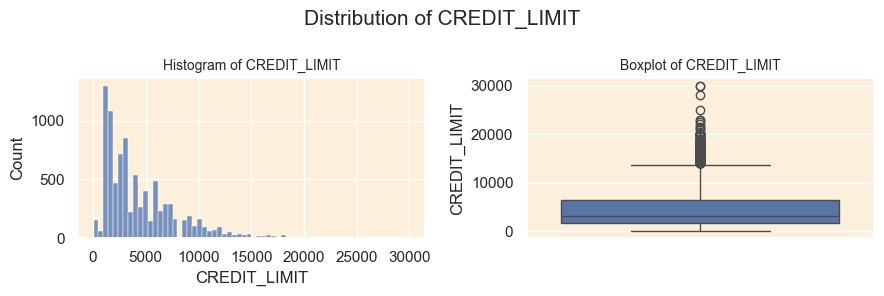

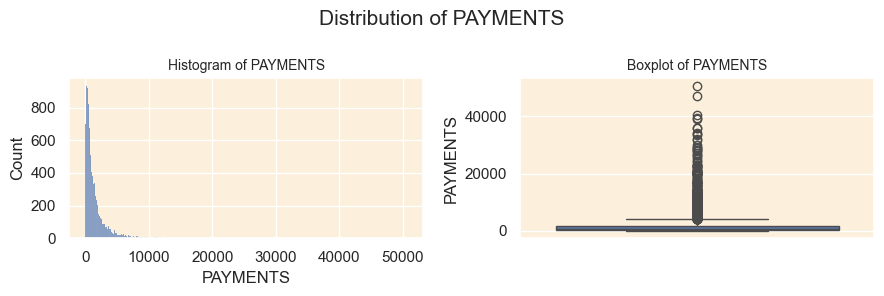

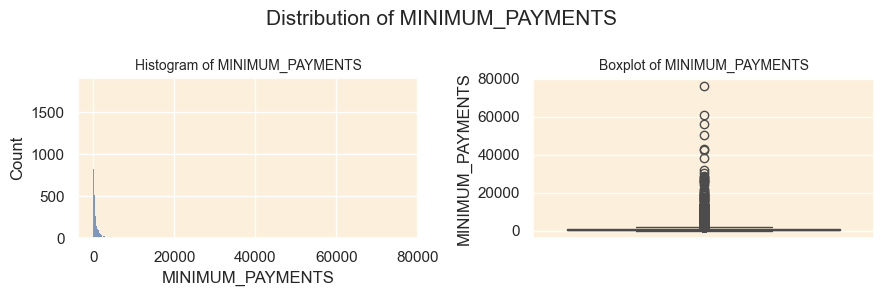

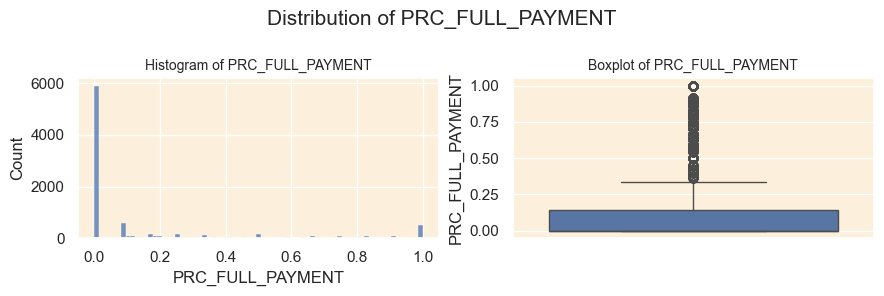

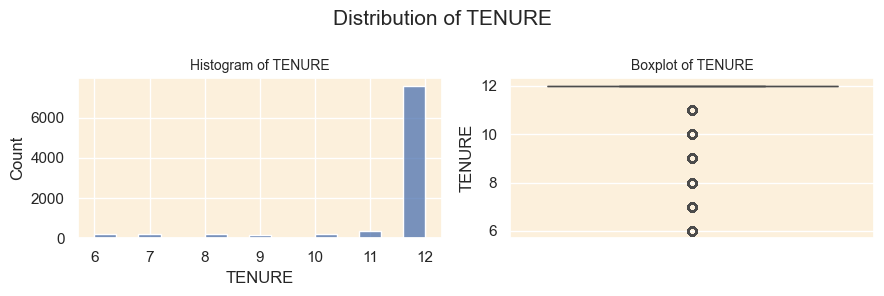

In [35]:
for col in list(df.columns):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 3))

    ax1 = sns.histplot(df[col], ax=ax1)
    ax1.set_title("Histogram of "+ str(col), fontsize=10)

    ax2=sns.boxplot(df[col], ax=ax2)
    ax2.set_title("Boxplot of "+ str(col), fontsize=10)

    plt.suptitle("Distribution of "+ str(col), fontsize=15)
    plt.tight_layout()

**Inferences:**

* CREDIT_LIMIT: The average amount of credit given to this customers is approximately 4494.449450. The minimum credit being 50.000000 and the maximum 30000.00000. However there is a huge gap between the 75th percentile and the maximum credit. While there are customers who have very high credit but the majority of this customers which is more than 70% of this customers have credit thatis less than 6500.000000.

* PURCHASES: The average amount of purchases made using a credit card is approximately 1003.204834. The standard deviationis quite large, indicate a spread in the dataset. There is a large difference between the 75th percentile and the maximum purchase value. This indicates the presence of outliers in the dataset.Meaning the distribution of this column is skewed. We can also confirm the skewness by looing at the mean and median that is far apart. Also the value of skewness for this column confirms right skew.

* PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, MINIMUM_PAYMENTS  are positively skewed. Meaning majority of this customers are bulk around lower values in this features.

* Overall, there is a high number of outliers in this dataset which can affect the model negatively by promoting bias to features with high values. This features should be scaled for a model to perform well.



### Correlation between variables.

Text(0.5, 1.0, 'CorrelationHeatmap')

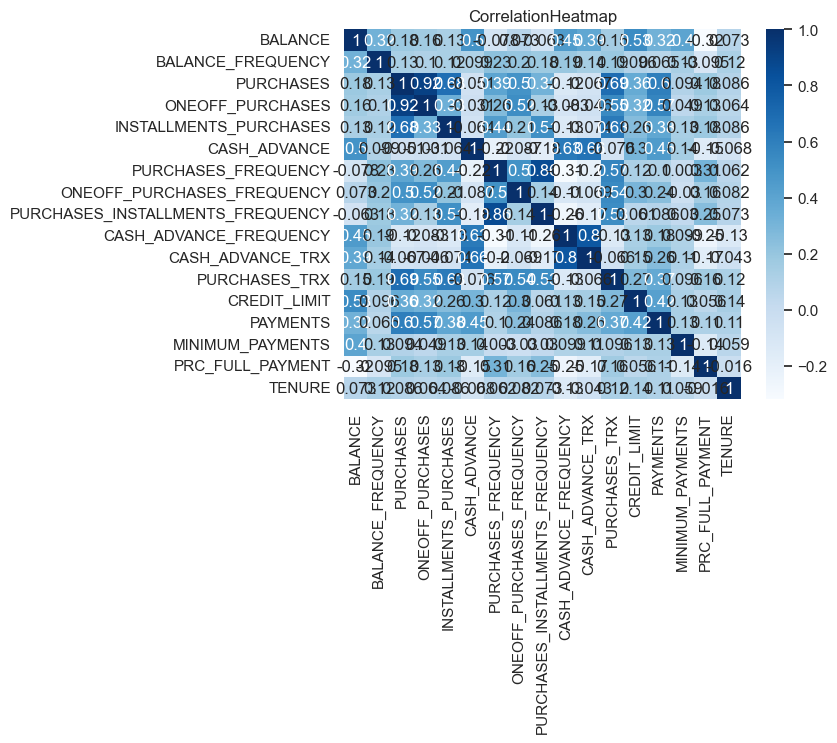

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("CorrelationHeatmap", fontsize=15);

In [6]:
df[df["MINIMUM_PAYMENTS"].isnull() | df["CREDIT_LIMIT"].isnull()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5        1.151323           0.181818      60.30             60.30   
50    1437.895562           1.000000     350.00              0.00   
94     103.393689           1.000000       0.00              0.00   
95     207.632783           1.000000      45.65             45.65   
110   5837.105453           1.000000    3488.49           3262.25   
...           ...                ...        ...               ...   
8817     4.256664           0.181818      31.25              0.00   
8845     0.187069           0.090909     522.00            290.00   
8846    74.430900           1.000000      45.65             45.65   
8857     6.660517           0.636364     310.00              0.00   
8945     5.120644           0.200000      55.55              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5                       0.00      0.000000             0.083333   
50                    350.00      0.000000             0.166667   
94                      0.00   1820.800715             0.000000   
95                      0.00      0.000000             0.083333   
110                   226.24   3303.152300             1.000000   
...                      ...           ...                  ...   
8817                   31.25      0.000000             0.083333   
8845                  232.00      0.000000             0.666667   
8846                    0.00      0.000000             0.083333   
8857                  310.00      0.000000             0.666667   
8945                   55.55      0.000000             0.100000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5                       0.083333                          0.000000   
50                      0.000000                          0.166667   
94                      0.000000                          0.000000   
95                      0.083333                          0.000000   
110                     1.000000                          0.500000   
...                          ...                               ...   
8817                    0.000000                          0.083333   
8845                    0.083333                          0.666667   
8846                    0.083333                          0.000000   
8857                    0.000000                          0.666667   
8945                    0.000000                          0.100000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5                   0.000000                 0              1        1200.0   
50                  0.000000                 0              2        4000.0   
94                  0.083333                 1              0        3000.0   
95                  0.000000                 0              1        1200.0   
110                 0.750000                15             46        7900.0   
...                      ...               ...            ...           ...   
8817                0.000000                 0              1        1000.0   
8845                0.000000                 0              9        2900.0   
8846                0.000000                 0              1        2500.0   
8857                0.000000                 0              8        1000.0   
8945                0.000000                 0              1        6000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5     697.573197               NaN               0.0      12  
50      0.000000               NaN               0.0      12  
94      0.000000               NaN               0.0      12  
95      0.000000               NaN               0.0      12  
110     0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8817    0.000000               NaN               0.0      12  
8845  760.989921               NaN               0.0      12  
8846    0.000000   

### Handling missing values strategy

*  MINIMUM_PAYMENTS: (~3.5% missing values)

The dataset is highly skewed, using a median to impute this values may seem reasonable. However, since the clustering is based on customer behaviour, it is crucial to have accurate data plus the missing percentage is not high we can simple drop the rows with missing values.

* CREDIT_LIMIT: (0.01% missing values)

Also this row can be dropped to avoid inconsistencies into the subsequent analyses.


In [9]:
df.dropna(inplace=True)